In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
sns.set_palette('colorblind')
sns.set_context('notebook')

In [2]:
df = pd.read_excel('intermediate_data/nullip_incontinence_age_stratified_prevalence_hand_processed.xlsx')
df.columns = ['Age', 'All individuals (n)', 
              'Any incontinence (n)', "Any incontinence (%)",
              "Stress urinary incontinence (n)", "Stress urinary incontinence (%)",
             "Urge urinary incontinence (n)", "Urge urinary incontinence (%)",
             "Mixed urinary incontinence (n)", "Mixed urinary incontinence (%)",
             "Nocturia (n)", "Nocturia (%)"]
df = df.drop(0)
df['Age Groups'] = df['Age'] + " ($\it{n}$=" + df['All individuals (n)'].astype(str) + ")"

melt_df = pd.melt(df, id_vars='Age Groups', var_name='Incontinence Category', value_name='n')
count = melt_df[melt_df['Incontinence Category'].str.contains(' \(n\)')]
count['Incontinence Category'] = count['Incontinence Category'].str.replace(' \(n\)', '')

perc = melt_df[melt_df['Incontinence Category'].str.contains('%')]
perc['Incontinence Category'] = perc['Incontinence Category'].str.replace(' \(%\)', '')
perc = perc.rename(columns={'n': '% of Age Group'})

perc['Incontinence Category'] = perc['Incontinence Category'].str.replace(' incontinence', '\nincontinence')

/home/fin/miniconda3/envs/eda/lib/python3.7/site-packages/ipykernel_launcher.py:13: FutureWarning: The default value of regex will change from True to False in a future version.
  del sys.path[0]
/home/fin/miniconda3/envs/eda/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
/home/fin/miniconda3/envs/eda/lib/python3.7/site-packages/ipykernel_launcher.py:16: FutureWarning: The default value of regex will change from True to False in a future version.
  app.launch_new_instance()
/home/fin/miniconda3/envs/eda/lib/python3.7/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_i

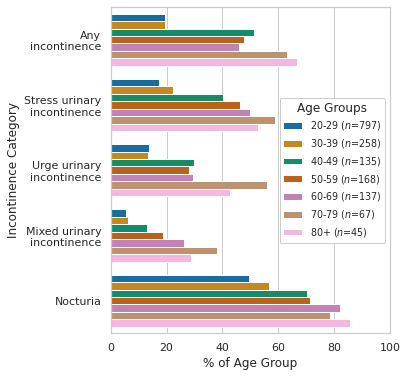

In [3]:
plt.figure(figsize=(5,6))
sns.barplot(data = perc, y='Incontinence Category', x='% of Age Group', hue='Age Groups')
plt.xlim(0,100)
#plt.legend(bbox_to_anchor = (1, 0.5152, 0.525, 0.5), title="Age Groups", labelspacing=2, fontsize=12)
#plt.legend(bbox_to_anchor = 'best', title="Age Groups", labelspacing=2, fontsize=12)
plt.legend(framealpha=1.0, fontsize=9.5, title='Age Groups')
plt.savefig('figures/nullip_by_category.png', dpi=300, bbox_inches='tight')